## Capstone project - Battle of Neighbourhoods  

### 1. Introduction  

#### 1.1 Background  

I currently live in Melbourne and I have been offered a great opportunity to work for a leading Finance firm in Canberra. I am very excited and I want to use this opportunity to practice my learnings in Coursera in order to answer my key question, finding out an affordable and enjoyable place similar to mine now in Melbourne.

Melbourne is the coastal capital of the southeastern Australian state of Victoria. At the city's centre is the modern Federation Square development, with plazas, bars, and restaurants by the Yarra River. Being in Melbourne I enjoy many ammenities and venues in the area, such as various international cousine restaurants, cafes, food shops and entertainment. On the other hand, Canberra is the capital city of Australia. It is also the location of many social and cultural institutions of national significance such as the Australian War Memorial, the Australian National University, the Royal Australian Mint, the Australian Institute of Sport, the National Gallery, the National Museum and the National Library. It is home to many important institutions of the federal government.

In order to make a comparison and evaluation of the rental options in Canberra, I must set some basis, therefore the apartment in Canberra must meet the following demands:  
1. Apartment Size : 2-3 bedroom unit
2. Location : Close to public commute stations  
3. Rent: Not more than 800 per week  
4. Others: ammenities in the selected neighborhood shall be similar to current residence  

#### 1.2 Business Problem  

The goal is to find a affordale and suitable neighbourhood in Canberra that complies with the demands on location, rent and venues.

### 2. Data  

#### 2.1 Description of the Data  

* List of Boroughs and neighborhoods of Canberra with their geodata (latitude and longitude)
* List of Train stations in Canberra with their address location
* List of apartments for rent in Canberra with their addresses, no.of beds and weekly rent
* Venues for each Canberra neighborhood
* Venues near my location in Melbourne

The above mentioned data will be collected using webpage scraping and manual data collection from rental websites. The key dataset of Canberra (Suburbs with latitude & longitude data) is downloaded Australia Post Website.  
#### 2.2 How the Data will be used to solve the given business problem  

* Use of Foursquare and geopy data to map top 10 venues for all Canbeera neighborhoods and cluster in groups
* Use of foursquare and geopy data to map the location of train stations on top of the above clustered map in order to explore the venues near each station
* Use Foursquare and geopy data to map the location of rental places
* create a map that provides an overview of the following information 
 1. average rental price for a 2 bedroom unit
 2. near by bus stations
 3. venues near by similar to my location in Melbourne 

The procesing of these DATA will give us better understanding of house rents, venues and train stations around each neighbourhood in Canberra. It will allow us to answer our business problem, which is to find a affordale and suitable neighbourhood in Canberra that complies with the demands on location, rent and venues.

### 3. Methodology Section  

This section represents the main component of the report where the data is gathered, prepared for analysis. The tools described are used here and the Notebook cells indicates the execution of steps.  

#### Exploratory Data Analysis  

##### Current residence and venues in neighbourhood - Melbourne

In [2]:
# Import all required libraries

import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [3]:
# Docklands, Melbourne
address = 'Bourke street, Docklands'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bourke Street, Docklands home are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of Bourke Street, Docklands home are -37.8203097, 144.9419935.


In [4]:
neighborhood_latitude= latitude
neighborhood_longitude= longitude

#### Dial FourSquare to find venues around current residence in Melbourne

In [5]:
CLIENT_ID = # Removed for sharing
CLIENT_SECRET = # Removed for sharing
VERSION = '20190902'

In [87]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [7]:
# results display is hidden for report simplification 
results = requests.get(url).json()
#results

#### Function that extracts the category of the venue - from the FourSquare lab

In [8]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [9]:
venues = results['response']['groups'][0]['items']
docklands_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
docklands_venues =docklands_venues.loc[:, filtered_columns]
# filter the category for each row
docklands_venues['venue.categories'] = docklands_venues.apply(get_category_type, axis=1)
# clean columns
docklands_venues.columns = [col.split(".")[-1] for col in docklands_venues.columns]

docklands_venues.shape

(100, 4)

In [79]:
docklands_venues.head(10)

,name,categories,lat,lng
0,Blended Beard,Coffee Shop,-37.819633,144.944355
1,Cafe Bambino,Café,-37.819922,144.945437
2,Banoi,Vietnamese Restaurant,-37.819507,144.945172
3,Code Black Coffee Roasters,Coffee Shop,-37.820797,144.945380
4,Pok Pok Thai Street Food,Thai Restaurant,-37.819495,144.945275
5,Mama Rumaan,Middle Eastern Restaurant,-37.816491,144.943757
6,Coffee Gauge,Coffee Shop,-37.819977,144.943955
7,Tap 831,Restaurant,-37.819903,144.943683
8,The Mill & Bakery,Bakery,-37.816670,144.944072
9,Hooks at the Yarra,Seafood Restaurant,-37.824059,144.947606


In [11]:
# create map of Docklands, Melbourne place  using latitude and longitude values
map_dl = folium.Map(location=[latitude, longitude], zoom_start=18)
# add markers to map
for lat, lng, label in zip(docklands_venues['lat'], docklands_venues['lng'], docklands_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='red',
        fill_color='#0f0fff',
        fill_opacity=0.6,
    ).add_to(map_dl)  
    
map_dl

In [12]:
# Reading Canberra Suburbs dataset

url='https://github.com/babmano/Applied-Data-Science-Capstone-Project/blob/master/Canberra_Neigh.csv'
df_can=pd.read_html(url, header=0)[0]

df_can.head()

,Unnamed: 0,postcode,locality,State
0,NaN,2540,HMAS CRESWELL,ACT
1,NaN,2540,JERVIS BAY,ACT
2,NaN,2600,BARTON,ACT
3,NaN,2600,CANBERRA,ACT
4,NaN,2600,CAPITAL HILL,ACT


In [13]:
df_can.drop(['Unnamed: 0'], axis=1, inplace=True)

In [14]:
df_can.head()

,postcode,locality,State
0,2540,HMAS CRESWELL,ACT
1,2540,JERVIS BAY,ACT
2,2600,BARTON,ACT
3,2600,CANBERRA,ACT
4,2600,CAPITAL HILL,ACT


In [15]:
# grouping rows with same post code values
df_can = df_can.groupby(['postcode','State'], sort=False).locality.apply(','.join).reset_index(name='locality')

In [16]:
df_can.head()

,postcode,State,locality
0,2540,ACT,"HMAS CRESWELL,JERVIS BAY"
1,2600,ACT,"BARTON,CANBERRA,CAPITAL HILL,DEAKIN,DEAKIN WES..."
2,2601,ACT,"ACTON,BLACK MOUNTAIN,CANBERRA,CITY"
3,2602,ACT,"AINSLIE,DICKSON,DOWNER,HACKETT,LYNEHAM,O'CONNO..."
4,2603,ACT,"FORREST,GRIFFITH,MANUKA,RED HILL"


In [17]:
df_can.shape

(26, 3)

In [18]:
# Read Latituide and Longitdue data from csv and transform into a pandas data frame

ll_url = 'https://github.com/babmano/Applied-Data-Science-Capstone-Project/blob/master/Canberra_Neigh_lon_lat.csv'
df_can_geo=pd.read_html(ll_url, header=0)[0]

df_can_geo.head()

,Unnamed: 0,postcode,latitude,longitude
0,NaN,2540,-34.863483,150.616440
1,NaN,2600,-35.302911,149.201072
2,NaN,2601,-35.275863,149.113796
3,NaN,2602,-35.248071,149.148147
4,NaN,2603,-35.330382,149.125739


In [19]:
df_can_geo.drop(['Unnamed: 0'], axis=1, inplace=True)

df_can_geo.shape

(26, 3)

In [20]:
df_can_geo.head()

,postcode,latitude,longitude
0,2540,-34.863483,150.616440
1,2600,-35.302911,149.201072
2,2601,-35.275863,149.113796
3,2602,-35.248071,149.148147
4,2603,-35.330382,149.125739


In [21]:
# Merge the two data frames and assign results to a new data frame

df_can_ll = df_can.merge(df_can_geo, on='postcode')
df_can_ll.head()

,postcode,State,locality,latitude,longitude
0,2540,ACT,"HMAS CRESWELL,JERVIS BAY",-34.863483,150.616440
1,2600,ACT,"BARTON,CANBERRA,CAPITAL HILL,DEAKIN,DEAKIN WES...",-35.302911,149.201072
2,2601,ACT,"ACTON,BLACK MOUNTAIN,CANBERRA,CITY",-35.275863,149.113796
3,2602,ACT,"AINSLIE,DICKSON,DOWNER,HACKETT,LYNEHAM,O'CONNO...",-35.248071,149.148147
4,2603,ACT,"FORREST,GRIFFITH,MANUKA,RED HILL",-35.330382,149.125739


Lets get the coordinates of Canberra, ACT

In [22]:
address = 'Canberra, ACT'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto, Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto, Toronto are -35.2975906, 149.1012676.


In [23]:
# create map of Canberra using latitude and longitude values
map_cn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_can_ll['latitude'], df_can_ll['longitude'], df_can_ll['locality']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cn)  
    
map_cn

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['nh_name', 
                  'nh_lat', 
                  'nh_lon', 
                  'Venue', 
                  'Venue Latitude', 'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
dt_venues = getNearbyVenues(names=df_can_ll['locality'],
                                   latitudes=df_can_ll['latitude'],
                                   longitudes=df_can_ll['longitude']
                                  )

HMAS CRESWELL,JERVIS BAY
BARTON,CANBERRA,CAPITAL HILL,DEAKIN,DEAKIN WEST,DUNTROON,FAIRBAIRN RAAF,HARMAN,HMAS HARMAN,PARKES,PARLIAMENT HOUSE,RUSSELL,RUSSELL HILL,YARRALUMLA
ACTON,BLACK MOUNTAIN,CANBERRA,CITY
AINSLIE,DICKSON,DOWNER,HACKETT,LYNEHAM,O'CONNOR,WATSON
FORREST,GRIFFITH,MANUKA,RED HILL
CAUSEWAY,KINGSTON,NARRABUNDAH
CURTIN,GARRAN,HUGHES
CHIFLEY,LYONS,O'MALLEY,PHILLIP,PHILLIP DC,SWINGER HILL,WODEN
FARRER,ISAACS,MAWSON,PEARCE,TORRENS
URIARRA FOREST,WARAMANGA,WESTON,WESTON CREEK,CHAPMAN,DUFFY,FISHER,HOLDER,MOUNT STROMLO,PIERCES CREEK,RIVETT,STIRLING,URIARRA
BRADDON,CAMPBELL,REID,TURNER
ARANDA,COOK,HAWKER,JAMISON CENTRE,MACQUARIE,PAGE,SCULLIN,WEETANGERA
CHARNWOOD,DUNLOP,FLOREY,FLYNN,FRASER,HIGGINS,HOLT,KIPPAX,KIPPAX CENTRE,LATHAM,MACGREGOR,MELBA,SPENCE
BELCONNEN
BELCONNEN,BELCONNEN DC,BRUCE,EVATT,GIRALANG,KALEEN,LAWSON,MCKELLAR,UNIVERSITY OF CANBERRA
HALL
HUME,KOWEN FOREST,OAKS ESTATE,THARWA,TOP NAAS
CANBERRA INTERNATIONAL AIRPORT,FYSHWICK,PIALLIGO,SYMONSTON
CRACE,MITCHELL
GUNGAHLIN

In [26]:
dt_venues.head()

,nh_name,nh_lat,nh_lon,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"HMAS CRESWELL,JERVIS BAY",-34.863483,150.616440,Shoalhaven Caravan Village Apartments,-34.865359,150.614683,Hotel
1,"HMAS CRESWELL,JERVIS BAY",-34.863483,150.616440,Shoalhaven River Café,-34.861627,150.614404,Café
2,"BARTON,CANBERRA,CAPITAL HILL,DEAKIN,DEAKIN WES...",-35.302911,149.201072,Lindsay & Edmunds Chocolate,-35.301340,149.200438,Dessert Shop
3,"BARTON,CANBERRA,CAPITAL HILL,DEAKIN,DEAKIN WES...",-35.302911,149.201072,Devine & Delicious,-35.301289,149.200128,Café
4,"ACTON,BLACK MOUNTAIN,CANBERRA,CITY",-35.275863,149.113796,Australian National Botanic Gardens,-35.278050,149.109428,Botanical Garden


lets check how many venues were returned for each neighbourhood

In [27]:
dt_venues.groupby('nh_name').count()

,nh_lat,nh_lon,Venue,Venue Latitude,Venue Longitude,Venue Category
nh_name,,,,,,
"ACTON,BLACK MOUNTAIN,CANBERRA,CITY",5,5,5,5,5,5
"AINSLIE,DICKSON,DOWNER,HACKETT,LYNEHAM,O'CONNOR,WATSON",3,3,3,3,3,3
"ARANDA,COOK,HAWKER,JAMISON CENTRE,MACQUARIE,PAGE,SCULLIN,WEETANGERA",1,1,1,1,1,1
"BANKS,CONDER,GORDON",9,9,9,9,9,9
"BARTON,CANBERRA,CAPITAL HILL,DEAKIN,DEAKIN WEST,DUNTROON,FAIRBAIRN RAAF,HARMAN,HMAS HARMAN,PARKES,PARLIAMENT HOUSE,RUSSELL,RUSSELL HILL,YARRALUMLA",2,2,2,2,2,2
BELCONNEN,9,9,9,9,9,9
"BELCONNEN,BELCONNEN DC,BRUCE,EVATT,GIRALANG,KALEEN,LAWSON,MCKELLAR,UNIVERSITY OF CANBERRA",1,1,1,1,1,1
"BONYTHON,CALWELL,CHISHOLM,GILMORE,ISABELLA PLAINS,RICHARDSON,THEODORE",1,1,1,1,1,1
"BRADDON,CAMPBELL,REID,TURNER",11,11,11,11,11,11


Analyse Each Neighbourhood

In [28]:
# one hot encoding
dt_onehot = pd.get_dummies(dt_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dt_onehot['Neighborhood'] = dt_venues['nh_name'] 

# move neighborhood column to the first column
fixed_columns = [dt_onehot.columns[-1]] + list(dt_onehot.columns[:-1])
dt_onehot = dt_onehot[fixed_columns]

dt_onehot.head()

,Neighborhood,Asian Restaurant,Athletics & Sports,Bakery,Bank,Basketball Court,Botanical Garden,Bowling Alley,Burger Joint,Bus Station,Business Service,Café,Coffee Shop,Department Store,Dessert Shop,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Food Truck,Fried Chicken Joint,German Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Juice Bar,Lake,Liquor Store,Locksmith,Mediterranean Restaurant,Middle Eastern Restaurant,Multiplex,Music Venue,Paper / Office Supplies Store,Park,Pharmacy,Pizza Place,Pub,Rental Car Location,Rugby Pitch,Sandwich Place,Science Museum,Shopping Mall,Soccer Field,Social Club,Sports Bar,Sports Club,Supermarket,Sushi Restaurant,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Video Game Store,Yoga Studio
0,"HMAS CRESWELL,JERVIS BAY",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"HMAS CRESWELL,JERVIS BAY",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"BARTON,CANBERRA,CAPITAL HILL,DEAKIN,DEAKIN WES...",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"BARTON,CANBERRA,CAPITAL HILL,DEAKIN,DEAKIN WES...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"ACTON,BLACK MOUNTAIN,CANBERRA,CITY",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
dt_grouped = dt_onehot.groupby('Neighborhood').mean().reset_index()
dt_grouped

,Neighborhood,Asian Restaurant,Athletics & Sports,Bakery,Bank,Basketball Court,Botanical Garden,Bowling Alley,Burger Joint,Bus Station,Business Service,Café,Coffee Shop,Department Store,Dessert Shop,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Food Truck,Fried Chicken Joint,German Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Juice Bar,Lake,Liquor Store,Locksmith,Mediterranean Restaurant,Middle Eastern Restaurant,Multiplex,Music Venue,Paper / Office Supplies Store,Park,Pharmacy,Pizza Place,Pub,Rental Car Location,Rugby Pitch,Sandwich Place,Science Museum,Shopping Mall,Soccer Field,Social Club,Sports Bar,Sports Club,Supermarket,Sushi Restaurant,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Video Game Store,Yoga Studio
0,"ACTON,BLACK MOUNTAIN,CANBERRA,CITY",0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.000000,0.0,0.00,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.2,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
1,"AINSLIE,DICKSON,DOWNER,HACKETT,LYNEHAM,O'CONNO...",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.333333,0.000000,0.000000,0.000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.333333,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
2,"ARANDA,COOK,HAWKER,JAMISON CENTRE,MACQUARIE,PA...",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
3,"BANKS,CONDER,GORDON",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.00,0.000000,0.111111,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.111111,0.000000,0.000000,0.00,0.111111,0.0,0.111111,0.000000,0.000000,0.00,0.000000,0.222222,0.000000,0.000000,0.000,0.111111,0.000000,0.000000
4,"BARTON,CANBERRA,CAPITAL HILL,DEAKIN,DEAKIN WES...",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
5,BELCONNEN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.111111,0.0,0.00,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.111111,0.000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000,0.000000,0.111111,0.111111,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.111111,0.111111,0.000,0.000000,0.000000,0.000000
6,"BELCONNEN,BELCONNEN DC,BRUCE,EVATT,GIRALANG,KA...",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00000

Let's print each neighborhood along with the top 3 most common venues

In [30]:
num_top_venues = 3

for hood in dt_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = dt_grouped[dt_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ACTON,BLACK MOUNTAIN,CANBERRA,CITY----
              venue  freq
0              Café   0.6
1  Botanical Garden   0.2
2    Science Museum   0.2


----AINSLIE,DICKSON,DOWNER,HACKETT,LYNEHAM,O'CONNOR,WATSON----
          venue  freq
0          Lake  0.33
1        Hostel  0.33
2  Soccer Field  0.33


----ARANDA,COOK,HAWKER,JAMISON CENTRE,MACQUARIE,PAGE,SCULLIN,WEETANGERA----
              venue  freq
0       Bus Station   1.0
1  Asian Restaurant   0.0
2    Sandwich Place   0.0


----BANKS,CONDER,GORDON----
                  venue  freq
0           Supermarket  0.22
1        Sandwich Place  0.11
2  Fast Food Restaurant  0.11


----BARTON,CANBERRA,CAPITAL HILL,DEAKIN,DEAKIN WEST,DUNTROON,FAIRBAIRN RAAF,HARMAN,HMAS HARMAN,PARKES,PARLIAMENT HOUSE,RUSSELL,RUSSELL HILL,YARRALUMLA----
              venue  freq
0              Café   0.5
1      Dessert Shop   0.5
2  Asian Restaurant   0.0


----BELCONNEN----
              venue  freq
0      Liquor Store  0.11
1  Sushi Restaurant  0.11
2      De

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dt_grouped['Neighborhood']

for ind in np.arange(dt_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dt_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ACTON,BLACK MOUNTAIN,CANBERRA,CITY",Café,Botanical Garden,Science Museum,Yoga Studio,Electronics Store,Hotel,Hostel,Gym / Fitness Center,Gym,Grocery Store
1,"AINSLIE,DICKSON,DOWNER,HACKETT,LYNEHAM,O'CONNO...",Lake,Hostel,Soccer Field,Yoga Studio,Dessert Shop,Hotel,Gym / Fitness Center,Gym,Grocery Store,German Restaurant
2,"ARANDA,COOK,HAWKER,JAMISON CENTRE,MACQUARIE,PA...",Bus Station,Yoga Studio,Electronics Store,Ice Cream Shop,Hotel,Hostel,Gym / Fitness Center,Gym,Grocery Store,German Restaurant
3,"BANKS,CONDER,GORDON",Supermarket,Fried Chicken Joint,Fast Food Restaurant,Sandwich Place,Shopping Mall,Liquor Store,Pizza Place,Toy / Game Store,Grocery Store,German Restaurant
4,"BARTON,CANBERRA,CAPITAL HILL,DEAKIN,DEAKIN WES...",Dessert Shop,Café,Electronics Store,Ice Cream Shop,Hotel,Hostel,Gym / Fitness Center,Gym,Grocery Store,German Restaurant


Run k-means to cluster the neighborhood into 10 clusters.

In [33]:
#set number of clusters
kclusters = 10

dt_clustered = dt_grouped.drop('Neighborhood', 1)

#run k-means clustering
kmeans = KMeans( n_clusters=kclusters, init='k-means++',random_state=0, n_init=10).fit(dt_clustered)

#check cluster labels
kmeans.labels_[0:10]

array([8, 1, 4, 1, 8, 1, 7, 2, 1, 1], dtype=int32)

In [34]:
df_can_ll.rename(columns={"locality": "Neighborhood"}, inplace=True)

In [35]:
df_can_ll.head()

,postcode,State,Neighborhood,latitude,longitude
0,2540,ACT,"HMAS CRESWELL,JERVIS BAY",-34.863483,150.616440
1,2600,ACT,"BARTON,CANBERRA,CAPITAL HILL,DEAKIN,DEAKIN WES...",-35.302911,149.201072
2,2601,ACT,"ACTON,BLACK MOUNTAIN,CANBERRA,CITY",-35.275863,149.113796
3,2602,ACT,"AINSLIE,DICKSON,DOWNER,HACKETT,LYNEHAM,O'CONNO...",-35.248071,149.148147
4,2603,ACT,"FORREST,GRIFFITH,MANUKA,RED HILL",-35.330382,149.125739


In [36]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_) 
dt_merged = df_can_ll
#merge
dt_merged = dt_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
dt_merged.reset_index
dt_merged.head()

,postcode,State,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2540,ACT,"HMAS CRESWELL,JERVIS BAY",-34.863483,150.616440,8.0,Hotel,Café,Yoga Studio,Electronics Store,Ice Cream Shop,Hostel,Gym / Fitness Center,Gym,Grocery Store,German Restaurant
1,2600,ACT,"BARTON,CANBERRA,CAPITAL HILL,DEAKIN,DEAKIN WES...",-35.302911,149.201072,8.0,Dessert Shop,Café,Electronics Store,Ice Cream Shop,Hotel,Hostel,Gym / Fitness Center,Gym,Grocery Store,German Restaurant
2,2601,ACT,"ACTON,BLACK MOUNTAIN,CANBERRA,CITY",-35.275863,149.113796,8.0,Café,Botanical Garden,Science Museum,Yoga Studio,Electronics Store,Hotel,Hostel,Gym / Fitness Center,Gym,Grocery Store
3,2602,ACT,"AINSLIE,DICKSON,DOWNER,HACKETT,LYNEHAM,O'CONNO...",-35.248071,149.148147,1.0,Lake,Hostel,Soccer Field,Yoga Studio,Dessert Shop,Hotel,Gym / Fitness Center,Gym,Grocery Store,German Restaurant
4,2603,ACT,"FORREST,GRIFFITH,MANUKA,RED HILL",-35.330382,149.125739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Map of Canberra neighborhoods with top 10 Clustered venues

In [37]:
# create map of Canberra using latitude and longitude values from Nominatim

kclusters=5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dt_merged['latitude'], dt_merged['longitude'], dt_merged['Neighborhood'], dt_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(df_can_ll['latitude'], df_can_ll['longitude'], df_can_ll['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

#### Examine a paticular Cluster - print venues  

After examining several cluster data , I concluded that cluster # 1 resembles closer the Singapore place, therefore providing guidance as to where to look for the future apartment.  

Assign a value to 'k' to explore a given cluster.

In [38]:
## k is the cluster number to explore
k = 1
dt_merged.loc[dt_merged['Cluster Labels'] == k, dt_merged.columns[[0] + list(range(5, dt_merged.shape[1]))]]

,postcode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,2602,1.0,Lake,Hostel,Soccer Field,Yoga Studio,Dessert Shop,Hotel,Gym / Fitness Center,Gym,Grocery Store,German Restaurant
5,2604,1.0,Hotel,German Restaurant,Food Truck,Yoga Studio,Video Game Store,Ice Cream Shop,Hostel,Gym / Fitness Center,Gym,Grocery Store
6,2605,1.0,Bakery,Gym / Fitness Center,Fast Food Restaurant,Yoga Studio,Electronics Store,Ice Cream Shop,Hotel,Hostel,Gym,Grocery Store
7,2606,1.0,Asian Restaurant,Café,Liquor Store,Middle Eastern Restaurant,Electronics Store,Sandwich Place,Indian Restaurant,Thrift / Vintage Store,Botanical Garden,Fish & Chips Shop
8,2607,1.0,Rugby Pitch,Supermarket,Sports Bar,Fish & Chips Shop,Department Store,Hostel,Gym / Fitness Center,Gym,Grocery Store,German Restaurant
10,2612,1.0,Hotel,Yoga Studio,Café,Liquor Store,Mediterranean Restaurant,Food Truck,Park,Pub,Rental Car Location,Athletics & Sports
13,2616,1.0,Ice Cream Shop,Dessert Shop,Paper / Office Supplies Store,Thai Restaurant,Sushi Restaurant,Music Venue,Liquor Store,Café,Burger Joint,Fried Chicken Joint
20,2900,1.0,Coffee Shop,Department Store,Supermarket,Hotel,Electronics Store,Pub,Café,Bowling Alley,Multiplex,Basketball Court
25,2906,1.0,Supermarket,Fried Chicken Joint,Fast Food Restaurant,Sandwich Place,Shopping Mall,Liquor Store,Pizza Place,Toy / Game Store,Grocery Store,German Restaurant


#### Map of Canberra places for rent  

Several Canberra's real estate webpages were webscrapped to collect rental data, as mentioned in section 2.0 . The resut was summarized in a csv file for direct reading, in order to consolidate the proces.

In [55]:
dt_merged = dt_merged.dropna()

In [56]:
dt_merged.head()

,postcode,State,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2540,ACT,"HMAS CRESWELL,JERVIS BAY",-34.863483,150.616440,8.0,Hotel,Café,Yoga Studio,Electronics Store,Ice Cream Shop,Hostel,Gym / Fitness Center,Gym,Grocery Store,German Restaurant
1,2600,ACT,"BARTON,CANBERRA,CAPITAL HILL,DEAKIN,DEAKIN WES...",-35.302911,149.201072,8.0,Dessert Shop,Café,Electronics Store,Ice Cream Shop,Hotel,Hostel,Gym / Fitness Center,Gym,Grocery Store,German Restaurant
2,2601,ACT,"ACTON,BLACK MOUNTAIN,CANBERRA,CITY",-35.275863,149.113796,8.0,Café,Botanical Garden,Science Museum,Yoga Studio,Electronics Store,Hotel,Hostel,Gym / Fitness Center,Gym,Grocery Store
3,2602,ACT,"AINSLIE,DICKSON,DOWNER,HACKETT,LYNEHAM,O'CONNO...",-35.248071,149.148147,1.0,Lake,Hostel,Soccer Field,Yoga Studio,Dessert Shop,Hotel,Gym / Fitness Center,Gym,Grocery Store,German Restaurant
5,2604,ACT,"CAUSEWAY,KINGSTON,NARRABUNDAH",-35.336413,149.147614,1.0,Hotel,German Restaurant,Food Truck,Yoga Studio,Video Game Store,Ice Cream Shop,Hostel,Gym / Fitness Center,Gym,Grocery Store


In [80]:
rent_url = 'https://github.com/babmano/Applied-Data-Science-Capstone-Project/blob/master/House%20rental%20prices.csv'
df_can_rent=pd.read_html(rent_url, header=0)[0]

df_can_rent.head()

,Unnamed: 0,Postcode,Neighborhood,No.of Beds,Rent_Price,latitude,longitude
0,NaN,2905,CHISHOLM,5,1000.0,-35.431011,149.110025
1,NaN,2903,WANNIASSA,3,750.0,-35.402705,149.081776
2,NaN,2905,RICHARDSON,4,530.0,-35.431011,149.110025
3,NaN,2904,GOWRIE,2,500.0,-35.410206,149.111402
4,NaN,2905,BONYTHON,2,500.0,-35.431011,149.110025


In [81]:
df_can_rent.drop(['Unnamed: 0'], axis=1, inplace=True)

In [82]:
df_can_rent.head()

,Postcode,Neighborhood,No.of Beds,Rent_Price,latitude,longitude
0,2905,CHISHOLM,5,1000.0,-35.431011,149.110025
1,2903,WANNIASSA,3,750.0,-35.402705,149.081776
2,2905,RICHARDSON,4,530.0,-35.431011,149.110025
3,2904,GOWRIE,2,500.0,-35.410206,149.111402
4,2905,BONYTHON,2,500.0,-35.431011,149.110025


#### Canberra apartment/houses rent price statistics  
AUD 800 Dollar per week rent is actually around the mean value - similar to my current place

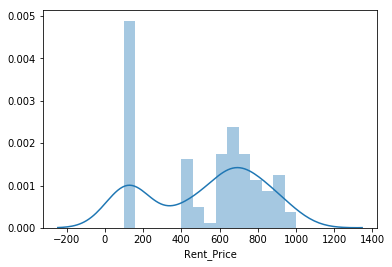

In [83]:
import seaborn as sns
sns.distplot(df_can_rent['Rent_Price'],bins=15)

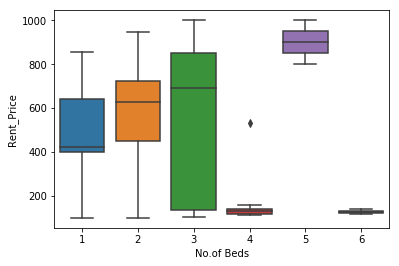

In [84]:
sns.boxplot(x='No.of Beds', y= 'Rent_Price', data=df_can_rent)

#### Map of Canberra apartments/houses for rent  
The popups will indicate the address and the weekly price for rent thus making it convenient to select the target appartment with the price condition estipulated

In [85]:
map_can_rent = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(df_can_rent['latitude'], df_can_rent['longitude'],'$ ' + df_can_rent['Rent_Price'].astype(str)+ ',  '+ df_can_rent['Neighborhood']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_can_rent) 
    

map_can_rent

#### Map of Canberra showing the places for rent and the cluster of venues  
Now, one can point to a rental place for price and address location information while knowing the cluster venues around it.  

This is an insightful way to explore rental possibilites

In [61]:
# create map with clusters
kclusters=5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dt_merged['latitude'], dt_merged['longitude'], dt_merged['Neighborhood'], dt_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,        
        color='red',
        fill=True,
        fill_color='cc3186',
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(df_can_rent['latitude'], df_can_rent['longitude'],'$ ' + df_can_rent['Rent_Price'].astype(str)+ df_can_rent['Neighborhood']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_can_rent.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_can_rent)

map_clusters2

Now one can explore a particular rental place and its venues in detail  

In the map above, examination of appartments with rental place below 800/Week is straightforwad while knowing the venues around it.  

We could find an appartment with at the right price and in a location with desirable venues. The next step is to see if it is located near a bus station, in next cells work.

In [46]:
## kk is the cluster number to explore
kk = 1
dt_merged.loc[dt_merged['Cluster Labels'] == kk, dt_merged.columns[[1] + list(range(5, dt_merged.shape[1]))]]

,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,ACT,1.0,Lake,Hostel,Soccer Field,Yoga Studio,Dessert Shop,Hotel,Gym / Fitness Center,Gym,Grocery Store,German Restaurant
5,ACT,1.0,Hotel,German Restaurant,Food Truck,Yoga Studio,Video Game Store,Ice Cream Shop,Hostel,Gym / Fitness Center,Gym,Grocery Store
6,ACT,1.0,Bakery,Gym / Fitness Center,Fast Food Restaurant,Yoga Studio,Electronics Store,Ice Cream Shop,Hotel,Hostel,Gym,Grocery Store
7,ACT,1.0,Asian Restaurant,Café,Liquor Store,Middle Eastern Restaurant,Electronics Store,Sandwich Place,Indian Restaurant,Thrift / Vintage Store,Botanical Garden,Fish & Chips Shop
8,ACT,1.0,Rugby Pitch,Supermarket,Sports Bar,Fish & Chips Shop,Department Store,Hostel,Gym / Fitness Center,Gym,Grocery Store,German Restaurant
10,ACT,1.0,Hotel,Yoga Studio,Café,Liquor Store,Mediterranean Restaurant,Food Truck,Park,Pub,Rental Car Location,Athletics & Sports
13,ACT,1.0,Ice Cream Shop,Dessert Shop,Paper / Office Supplies Store,Thai Restaurant,Sushi Restaurant,Music Venue,Liquor Store,Café,Burger Joint,Fried Chicken Joint
20,ACT,1.0,Coffee Shop,Department Store,Supermarket,Hotel,Electronics Store,Pub,Café,Bowling Alley,Multiplex,Basketball Court
25,ACT,1.0,Supermarket,Fried Chicken Joint,Fast Food Restaurant,Sandwich Place,Shopping Mall,Liquor Store,Pizza Place,Toy / Game Store,Grocery Store,German Restaurant


#### Mapping Canberra Bus Stations  

We have the csv file with geodata downloaded from www.data.govau

In [67]:
rent_url = 'https://github.com/babmano/Applied-Data-Science-Capstone-Project/blob/master/Bus_Stops.csv'
df_can_bus=pd.read_html(rent_url, header=0)[0]

df_can_bus.head()

,Unnamed: 0,Stop Name,Suburb,Postcode,Stop Latitude,Stop Longitude
0,NaN,BEATTIE CR AFTER GOLDSTEIN CR,CHISHOLM,2905,-35.418312,149.115570
1,NaN,LONGMORE CR AFTER HARKER PL,WANNIASSA,2903,-35.396854,149.104095
2,NaN,CLIFT CR AFTER HEAGNEY CR,RICHARDSON,2905,-35.426308,149.112473
3,NaN,CASTLETON CR OPP GOWRIE SHOPS,GOWRIE,2904,-35.414013,149.109390
4,NaN,BARR SMITH AV AFTER SALAS ST,BONYTHON,2905,-35.426731,149.074173


In [68]:
df_can_bus.drop(['Unnamed: 0'], axis=1, inplace=True)

df_can_bus.rename(columns={'Stop Latitude':'latitude', 'Stop Longitude':'longitude', 'Suburb':'Neighborhood'}, inplace=True)

df_can_bus.head()

,Stop Name,Neighborhood,Postcode,latitude,longitude
0,BEATTIE CR AFTER GOLDSTEIN CR,CHISHOLM,2905,-35.418312,149.115570
1,LONGMORE CR AFTER HARKER PL,WANNIASSA,2903,-35.396854,149.104095
2,CLIFT CR AFTER HEAGNEY CR,RICHARDSON,2905,-35.426308,149.112473
3,CASTLETON CR OPP GOWRIE SHOPS,GOWRIE,2904,-35.414013,149.109390
4,BARR SMITH AV AFTER SALAS ST,BONYTHON,2905,-35.426731,149.074173


In [70]:
# map bus stations 

map_bus = folium.Map(location=[-37.8203097, 144.9419935], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(df_can_bus['latitude'], df_can_bus['longitude'],  df_can_bus['Stop Name'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_bus) 
    
map_bus

#### Map of Canberra showing places for rent and the subway locations nearby  

Now, we can visualize the desirable rental places and their nearest bus station. Popups display rental address and monthly rental price and the bus station name.
Notice that the icon in the top-right corner is a "ruler" that allows to measure the distance from a rental place to an specific bus station

In [73]:
map_rent_bus = folium.Map(location=[-37.8203097, 144.9419935], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(df_can_rent['latitude'], df_can_rent['longitude'],'$ ' + df_can_rent['Rent_Price'].astype(str)+ df_can_rent['Neighborhood']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_rent_bus) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(df_can_bus['latitude'], df_can_bus['longitude'],  df_can_bus['Stop Name'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_rent_bus) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_rent_bus.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_rent_bus)

map_rent_bus

### 4.0 Results  

Let's consolidate all the required inforamtion to make the apartment selection in one map.Map of Canberra with rental places, but station locations and cluster of venues.  

Red dots are bus stations, Blue dots are apartments available for rent, Bubbles are the clusters of venues  

In [86]:
map_main = folium.Map(location=[-35.2813043,149.1204446], zoom_start=13.3)

# add markers to map for rental places
for lat, lng, label in zip(df_can_rent['latitude'], df_can_rent['longitude'],'$ ' + df_can_rent['Rent_Price'].astype(str)+ ', '+df_can_rent['Neighborhood']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_main) 
    
# add markers of bus station locations to map
for lat, lng, label in zip(df_can_bus['latitude'], df_can_bus['longitude'],  df_can_bus['Stop Name'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_main) 

# add markers to the map
for lat, lon, poi, cluster in zip(dt_merged['latitude'], dt_merged['longitude'], dt_merged['Neighborhood'], dt_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='cc3186',
        fill_opacity=0.7).add_to(map_main)

# Adds tool to the top right
from folium.plugins import MeasureControl
map_main.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_main)

map_main

#### Problem Resolution - Select the apartment for rent  

The above consolidate map was used to explore options.  

After examining, I was able to chose one location that meet the desired requirements.  

Apartment 1: Forrest Neighborhood and near 'LA PEROUSE ST AFTER CALEY CR' bus station, Cluster # 1 Monthly rent : 712 AUD  

Venues for Apartment 1 - Cluster 1  

In [77]:
k = 1
dt_merged.loc[dt_merged['Cluster Labels'] == k, dt_merged.columns[[1] + list(range(5, dt_merged.shape[1]))]]

,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,ACT,1.0,Lake,Hostel,Soccer Field,Yoga Studio,Dessert Shop,Hotel,Gym / Fitness Center,Gym,Grocery Store,German Restaurant
5,ACT,1.0,Hotel,German Restaurant,Food Truck,Yoga Studio,Video Game Store,Ice Cream Shop,Hostel,Gym / Fitness Center,Gym,Grocery Store
6,ACT,1.0,Bakery,Gym / Fitness Center,Fast Food Restaurant,Yoga Studio,Electronics Store,Ice Cream Shop,Hotel,Hostel,Gym,Grocery Store
7,ACT,1.0,Asian Restaurant,Café,Liquor Store,Middle Eastern Restaurant,Electronics Store,Sandwich Place,Indian Restaurant,Thrift / Vintage Store,Botanical Garden,Fish & Chips Shop
8,ACT,1.0,Rugby Pitch,Supermarket,Sports Bar,Fish & Chips Shop,Department Store,Hostel,Gym / Fitness Center,Gym,Grocery Store,German Restaurant
10,ACT,1.0,Hotel,Yoga Studio,Café,Liquor Store,Mediterranean Restaurant,Food Truck,Park,Pub,Rental Car Location,Athletics & Sports
13,ACT,1.0,Ice Cream Shop,Dessert Shop,Paper / Office Supplies Store,Thai Restaurant,Sushi Restaurant,Music Venue,Liquor Store,Café,Burger Joint,Fried Chicken Joint
20,ACT,1.0,Coffee Shop,Department Store,Supermarket,Hotel,Electronics Store,Pub,Café,Bowling Alley,Multiplex,Basketball Court
25,ACT,1.0,Supermarket,Fried Chicken Joint,Fast Food Restaurant,Sandwich Place,Shopping Mall,Liquor Store,Pizza Place,Toy / Game Store,Grocery Store,German Restaurant


### 5. Discussion 

In this study, I analyzed the relationship between Venues, commute stations and House rents. I identified that different type of venues and near by commute stations play an important role for house/apartmant rental prices in that Neighborhood. I built Maps with markers each for venues, bus stations and rental places to compare and find the right place similar to my current place.. These maps can be very useful in helping anyone to explore and decide a right place to move in into Canberra.

### 6. Conclusion  

This project has shown me a practical application to resolve a real world scenario using Data Science tools and methodologies. The mapping with Folium is a very powerful technique to consolidate information and make the analysis and decision thoroughly and with confidence.